<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/Comparacion_Adam_Batch_LearningRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación del desempeño de Adam con distintos mini-batches y tasas de aprendizaje

## Introducción

En el entrenamiento de redes neuronales profundas, el algoritmo de optimización es responsable de actualizar los pesos del modelo para minimizar la función de pérdida. Uno de los más usados actualmente es **Adam (Adaptive Moment Estimation)**, que combina las ventajas de SGD con Momentum y adaptatividad del aprendizaje.

Dos hiperparámetros críticos que afectan directamente la eficiencia y estabilidad del aprendizaje son:

- **Tamaño de mini-lote (batch size)**: determina cuántos ejemplos se utilizan en cada paso de actualización.
- **Tasa de aprendizaje (learning rate)**: controla la magnitud del ajuste en cada iteración.

Este notebook compara el rendimiento del modelo de clasificación de imágenes sobre el conjunto **MNIST** utilizando Adam bajo diferentes configuraciones de estos hiperparámetros.


## Objetivo

Evaluar cómo afectan el tamaño del mini-batch y la tasa de aprendizaje al proceso de optimización con el optimizador Adam, en una red neuronal simple aplicada a la tarea de clasificación de dígitos manuscritos (MNIST).


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def entrenar_modelo(batch_size, learning_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=0
    )
    return history.history['val_accuracy']


In [3]:
# Comparar configuraciones
combinaciones = [(16, 0.001), (64, 0.001), (256, 0.001), (64, 0.01), (64, 0.1)]
resultados = {}

for batch_size, lr in combinaciones:
    clave = f'Batch {batch_size} - LR {lr}'
    acc = entrenar_modelo(batch_size, lr)
    resultados[clave] = acc


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


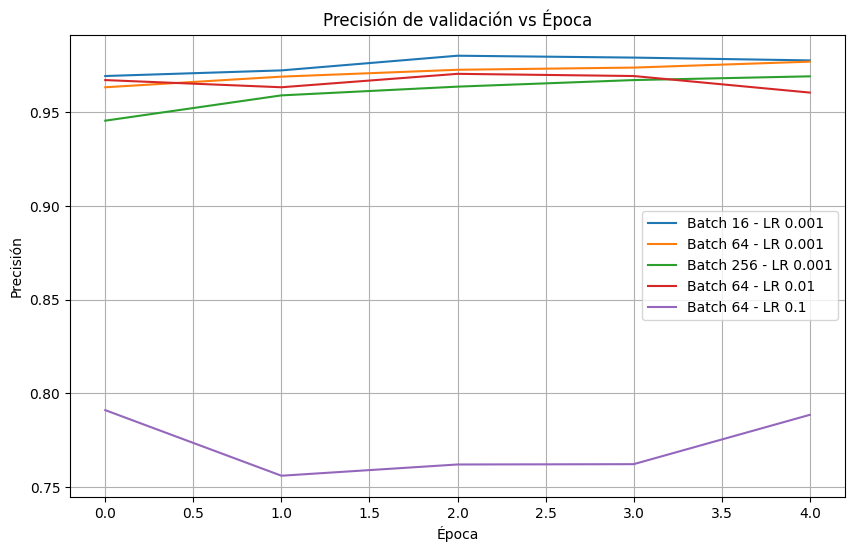

In [4]:
# Graficar resultados
plt.figure(figsize=(10,6))
for clave, acc in resultados.items():
    plt.plot(acc, label=clave)
plt.title("Precisión de validación vs Época")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


## Conclusiones

- La combinación del optimizador **Adam** con **mini-batches** permite alcanzar una buena precisión en pocas épocas, mostrando estabilidad en la convergencia.
- Tasa de aprendizaje demasiado alta (por ejemplo, 0.1) puede llevar a resultados inconsistentes o pobre generalización.
- Un **batch size intermedio (64)** junto con una tasa de aprendizaje moderada (0.001) tiende a proporcionar un buen equilibrio entre velocidad de entrenamiento y precisión.
- El ajuste fino de estos hiperparámetros es esencial y debe realizarse de forma empírica o con métodos automáticos como búsqueda en rejilla o validación cruzada.
